<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r4_unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-15-m-1-r4.csv?token=AKVFSOABFDAZAXOKV6D7AAS62AVSM')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-15-m-11-r4.csv?token=AKVFSOCFBDFKC42JVSVVKLS62AVSO')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-4-m-1-r4.csv?token=AKVFSOE32K37PYPZ4FO55SS62AVSW')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-4-m-11-r4.csv?token=AKVFSOGHJ7CJKVUHY2CWBRK62AVS2')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-6-m-1-r4.csv?token=AKVFSODAOBKRFYYP62UZZEC62AVTC')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-6-m-11-r4.csv?token=AKVFSOB6SMM2M4NLOSFBRR262AVTG')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-9-m-1-r4.csv?token=AKVFSOD2JJ33RRAGHQZ7BYS62AVTQ')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-9-m-11-r4.csv?token=AKVFSOAES3TPP22BNQWKSYK62AVTS')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-normal-n-0-15-r4.csv?token=AKVFSOEBUQMNYWHVUFBZFFS62AVT2')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-normal-n-0-4-r4.csv?token=AKVFSOARH7XAWSO2HNHYSYC62AVT4')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-normal-n-0-6-r4.csv?token=AKVFSOBUMSHVVP73AB65YFK62AVUA')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-normal-n-0-9-r4.csv?token=AKVFSOGRZIK5SDUZ4PZTTJC62AVUE')

df1['target'] = 0
df2['target'] = 0
df3['target'] = 0
df4['target'] = 0
df5['target'] = 0
df6['target'] = 0
df7['target'] = 0
df8['target'] = 0

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(101735, 30)
(100063, 30)
(151694, 30)
(149982, 30)
(105348, 30)
(103725, 30)
(101922, 30)
(100166, 30)
(74341, 30)
(124078, 30)
(78023, 30)
(74548, 30)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,4,4,23,7,2,3,0,0.0,4,6,1,6,6,36,0,1,4,8,3,27,9,0
1,7,2,0,1,1,4,3,9,4,4,23,7,2,3,0,0.0,4,12,1,12,12,144,0,1,4,8,3,27,9,1
2,7,2,0,1,1,4,3,9,4,4,23,7,3,3,0,0.0,4,6,1,6,6,36,0,1,4,12,3,27,9,0
3,70,0,2,4,1,1,5,17,23,7,4,4,2,3,3,1.0,16,11,2,12,22,264,0,4,4,8,20,85,100,1
4,71,0,2,4,2,2,5,17,23,7,4,4,2,3,3,1.0,17,10,3,12,30,360,0,8,16,32,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265620,3276593,2,0,4,2,2,5,19,20,4,15,15,30092,5,0,0.0,5,5,5,9,25,225,0,8,16,481472,20,95,100,0
1265621,3276594,2,0,4,3,2,5,19,20,4,15,15,30092,5,0,0.0,6,4,6,9,24,216,0,12,24,722208,20,95,100,0
1265622,3276595,2,0,4,4,2,5,19,20,4,15,15,30092,5,0,0.0,7,3,7,9,21,189,0,16,32,962944,20,95,100,0
1265623,3276596,2,0,3,1,4,3,10,20,4,18,2,30092,3,0,0.0,8,2,8,9,16,144,0,3,12,361104,9,30,27,0


In [0]:
df.shape

(1265625, 30)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-15-m-12-r4.csv?token=AKVFSOFLDELBUGOHH2QKK4C62AVSS')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-15-m-7-r4.csv?token=AKVFSODNB7JRX5FM7HPFZX262AVSU')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-4-m-12-r4.csv?token=AKVFSOA42ITKWVVH44SMUJS62AVS4')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-4-m-7-r4.csv?token=AKVFSOAHMO7PPRPXSTLEGGC62AVS6')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-6-m-12-r4.csv?token=AKVFSOCSJJV27QJZRTQOMSK62AVTK')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-6-m-7-r4.csv?token=AKVFSOBT77CBSFFDQGMXDPC62AVTM')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-9-m-12-r4.csv?token=AKVFSOHOQZPJ7HBIJHY5WGK62AVTU')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r4/2-fft-malicious-n-0-9-m-7-r4.csv?token=AKVFSOAMF2VYNAAI25OYRCC62AVTY')

In [0]:
df13['target'] = 0
df14['target'] = 0
df15['target'] = 0
df16['target'] = 0
df17['target'] = 0
df18['target'] = 0
df19['target'] = 0
df20['target'] = 0

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(108174, 30)
(103449, 30)
(158087, 30)
(153540, 30)
(111614, 30)
(107195, 30)
(108282, 30)
(103725, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,85,1,2,1,1,4,3,9,6,6,24,8,4,3,2,0.666667,13,1,1,1,1,1,2,1,4,16,3,27,9,0
1,106,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.750000,16,12,1,12,12,144,6,4,4,4,20,85,100,0
2,107,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.750000,17,11,2,12,22,264,6,8,16,16,20,85,100,0
3,108,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.750000,18,10,3,12,30,360,6,12,24,24,20,85,100,0
4,109,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.750000,19,9,4,12,36,432,6,16,32,32,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105343,3266159,3,2,7,1,4,3,9,22,6,0,0,30087,3,2,0.666667,13,1,1,1,1,1,6,7,28,842436,21,27,63,0
105344,3266203,3,2,4,1,1,5,17,23,7,0,0,30088,4,3,0.750000,17,4,1,4,4,16,6,4,4,120352,20,85,100,0
105345,3266204,3,2,4,2,2,5,17,23,7,0,0,30088,4,3,0.750000,18,3,2,4,6,24,6,8,16,481408,20,85,100,0
105346,3266205,3,2,4,3,2,5,17,23,7,0,0,30088,4,3,0.750000,19,2,3,4,6,24,6,12,24,722112,20,85,100,0


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.640860,-0.231043,0.017385,-0.027084,0.533824,0.547234,0.011146,0.164037,-0.257597,-0.557620,-0.456159,-0.146205,0.041253,-0.073315,-0.058808,-0.058546,0.529113,-0.147546,-0.106777,-0.067549,0.257988,0.538769,0.473817,0.040587
inport,-0.640860,1.000000,0.289527,-0.001553,0.002418,-0.475627,-0.566596,0.016753,0.084813,0.610024,0.855844,0.611373,0.074227,-0.164917,-0.063352,-0.049356,-0.032298,0.139108,0.164694,0.124014,0.092865,-0.156273,-0.525692,-0.388199,-0.012670
cache_coherence_type,-0.231043,0.289527,1.000000,0.197501,-0.307641,-0.342114,-0.390422,0.024052,0.035486,0.196786,0.271243,0.035501,0.062908,-0.113316,-0.035212,-0.029615,-0.013993,-0.055188,0.465445,0.378230,0.275194,0.583931,-0.363070,0.042148,-0.003908
flit_id,0.017385,-0.001553,0.197501,1.000000,0.044792,0.208797,0.177944,0.002038,-0.021720,-0.003028,-0.004105,0.295005,-0.084428,0.116484,0.022393,0.008579,0.005099,0.023541,0.933964,0.895044,0.629836,0.354087,0.196415,0.302175,0.001325
flit_type,-0.027084,0.002418,-0.307641,0.044792,1.000000,-0.325241,-0.277182,-0.003179,0.033830,0.004715,0.006394,0.351879,-0.070904,0.104751,0.023644,0.007494,0.009071,-0.036675,-0.011851,0.246982,0.176635,-0.551556,-0.305954,-0.470693,-0.002062
vnet,0.533824,-0.475627,-0.342114,0.208797,-0.325241,1.000000,0.971917,-0.023400,-0.024022,-0.142791,-0.302120,-0.492077,-0.119785,0.074323,-0.031757,-0.030367,-0.041621,0.277886,-0.038845,-0.071055,-0.065005,0.563047,0.990629,0.924404,0.027511
vc,0.547234,-0.566596,-0.390422,0.177944,-0.277182,0.971917,1.000000,-0.030076,-0.068686,-0.256525,-0.424187,-0.529882,-0.112677,0.111877,-0.000559,-0.001908,-0.016274,0.183640,-0.074986,-0.095945,-0.085755,0.496298,0.994016,0.874935,0.020078
traversal_id,0.011146,0.016753,0.024052,0.002038,-0.003179,-0.023400,-0.030076,1.000000,0.027081,0.016697,0.017643,0.026611,0.068840,0.068915,0.096229,0.075951,0.065761,0.051697,0.007134,0.007128,0.560801,0.000937,-0.027955,-0.015118,-0.258324
hop_count,0.164037,0.084813,0.035486,-0.021720,0.033830,-0.024022,-0.068686,0.027081,1.000000,0.613104,0.226307,0.300051,-0.039909,-0.093649,-0.093298,-0.074765,-0.063768,0.365381,-0.013792,-0.001267,0.012666,0.010457,-0.054108,-0.011138,-0.023544
current_hop,-0.257597,0.610024,0.196786,-0.003028,0.004715,-0.142791,-0.256525,0.016697,0.613104,1.000000,0.818575,0.591655,0.025117,-0.188177,-0.113906,-0.095633,-0.077048,0.348125,0.074862,0.066321,0.050997,0.049710,-0.208631,-0.071949,0.007665


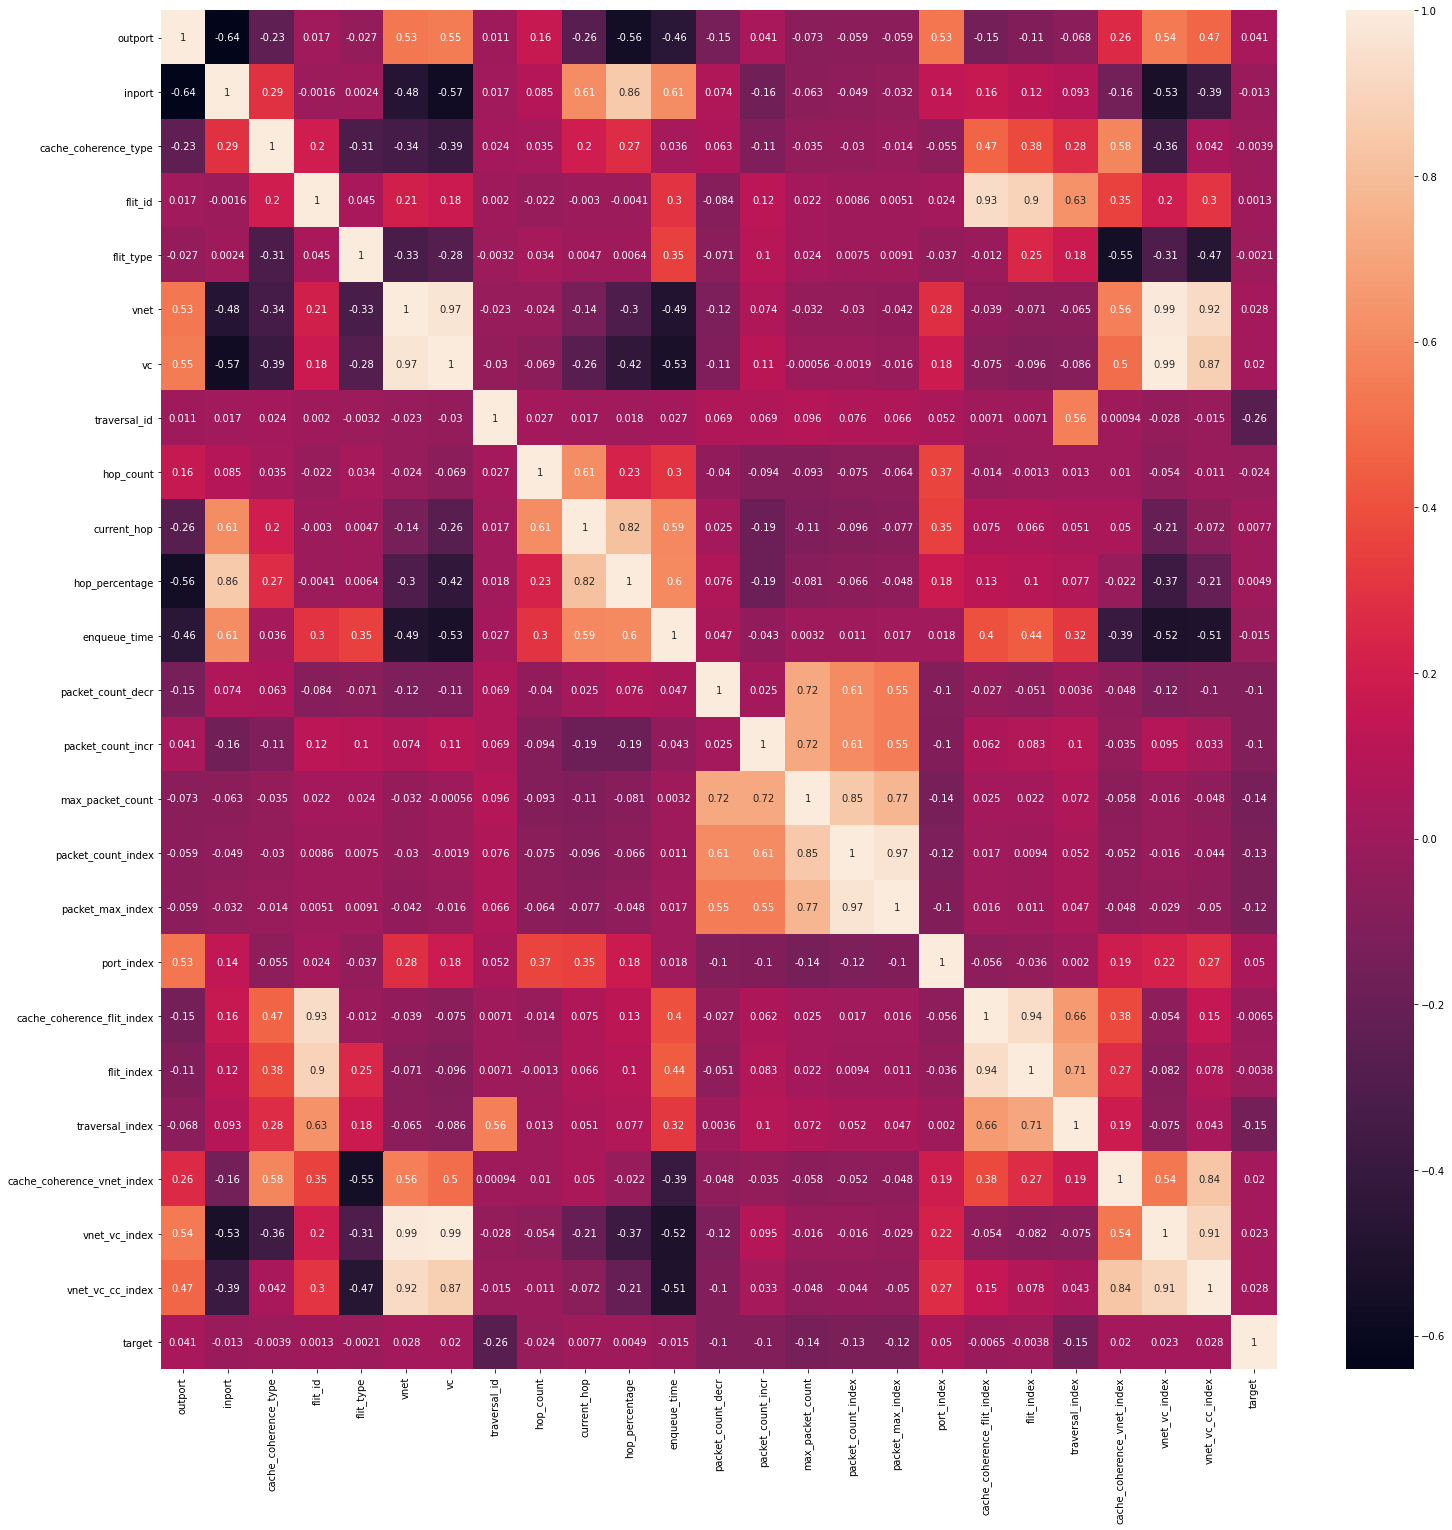

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,3,0,0.0,4,6,1,6,6,36,0,1,4,8,3,27,9
1,2,0,1,1,4,3,9,2,3,0,0.0,4,12,1,12,12,144,0,1,4,8,3,27,9
2,2,0,1,1,4,3,9,3,3,0,0.0,4,6,1,6,6,36,0,1,4,12,3,27,9
3,0,2,4,1,1,5,17,2,3,3,1.0,16,11,2,12,22,264,0,4,4,8,20,85,100
4,0,2,4,2,2,5,17,2,3,3,1.0,17,10,3,12,30,360,0,8,16,32,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265620,2,0,4,2,2,5,19,30092,5,0,0.0,5,5,5,9,25,225,0,8,16,481472,20,95,100
1265621,2,0,4,3,2,5,19,30092,5,0,0.0,6,4,6,9,24,216,0,12,24,722208,20,95,100
1265622,2,0,4,4,2,5,19,30092,5,0,0.0,7,3,7,9,21,189,0,16,32,962944,20,95,100
1265623,2,0,3,1,4,3,10,30092,3,0,0.0,8,2,8,9,16,144,0,3,12,361104,9,30,27


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.666667,0.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.500000,0.0,0.0,0.000000,0.138889,0.000000,0.138889,0.013889,0.002621,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.666667,0.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.500000,0.0,0.0,0.000000,0.305556,0.000000,0.305556,0.030556,0.010707,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.666667,0.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.500000,0.0,0.0,0.000000,0.138889,0.000000,0.138889,0.013889,0.002621,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
3,0.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.500000,0.6,1.0,0.166667,0.277778,0.027778,0.305556,0.058333,0.019692,0.0,0.103448,0.000000,0.000001,0.944444,0.794521,1.000000
4,0.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.500000,0.6,1.0,0.180556,0.250000,0.055556,0.305556,0.080556,0.026879,0.0,0.241379,0.139535,0.000010,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265620,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.909091,0.999967,0.833333,0.0,0.0,0.013889,0.111111,0.111111,0.222222,0.066667,0.016771,0.0,0.241379,0.139535,0.177782,0.944444,0.931507,1.000000
1265621,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.909091,0.999967,0.833333,0.0,0.0,0.027778,0.083333,0.138889,0.222222,0.063889,0.016098,0.0,0.379310,0.232558,0.266674,0.944444,0.931507,1.000000
1265622,0.666667,0.000000,0.500000,0.75,0.333333,1.0,0.909091,0.999967,0.833333,0.0,0.0,0.041667,0.055556,0.166667,0.222222,0.055556,0.014076,0.0,0.517241,0.325581,0.355566,0.944444,0.931507,1.000000
1265623,0.666667,0.000000,0.333333,0.00,1.000000,0.0,0.090909,0.999967,0.500000,0.0,0.0,0.055556,0.027778,0.194444,0.222222,0.041667,0.010707,0.0,0.068966,0.093023,0.133336,0.333333,0.041096,0.197802


In [0]:
train_X[train_X.duplicated()].shape

(37204, 24)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(61, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.0,0.6,0.6,0.75,0.166667,0.114286,0.000000,0.114286,0.011730,0.001949,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
1,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.0,0.6,0.6,0.75,0.180556,0.085714,0.028571,0.114286,0.020528,0.003168,1.0,0.241379,0.139535,0.000004,0.944444,0.794521,1.0
2,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.0,0.6,0.6,0.75,0.194444,0.057143,0.057143,0.114286,0.023460,0.003574,1.0,0.379310,0.232558,0.000007,0.944444,0.794521,1.0
3,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.0,0.6,0.6,0.75,0.208333,0.028571,0.085714,0.114286,0.020528,0.003168,1.0,0.517241,0.325581,0.000010,0.944444,0.794521,1.0
4,1.000000,0.666667,0.5,1.00,0.666667,1.0,0.727273,0.0,0.6,0.6,0.75,0.263889,0.000000,0.114286,0.114286,0.011730,0.001949,1.0,0.655172,0.651163,0.000021,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108169,0.666667,0.000000,0.5,0.00,0.000000,1.0,0.909091,1.0,0.8,0.0,0.00,0.013889,0.114286,0.114286,0.228571,0.070381,0.018195,0.0,0.103448,0.000000,0.044445,0.944444,0.931507,1.0
108170,0.666667,0.000000,0.5,0.25,0.333333,1.0,0.909091,1.0,0.8,0.0,0.00,0.027778,0.085714,0.142857,0.228571,0.067449,0.017464,0.0,0.241379,0.139535,0.177782,0.944444,0.931507,1.0
108171,0.666667,0.000000,0.5,0.50,0.333333,1.0,0.909091,1.0,0.8,0.0,0.00,0.041667,0.057143,0.171429,0.228571,0.058651,0.015271,0.0,0.379310,0.232558,0.266674,0.944444,0.931507,1.0
108172,0.666667,0.000000,0.5,0.75,0.333333,1.0,0.909091,1.0,0.8,0.0,0.00,0.055556,0.028571,0.200000,0.228571,0.043988,0.011616,0.0,0.517241,0.325581,0.355566,0.944444,0.931507,1.0


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(38, 24)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(17, 24)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(32, 24)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(51, 24)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(70, 24)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(15, 24)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(30, 24)


In [0]:
test_X8 = test_X[:30000]
test_X9 = test_X1[:30000]
test_X10  = test_X2[:30000]
test_X11  = test_X3[:30000]
test_X12  = test_X4[:30000]
test_X13  = test_X5[:30000]
test_X14  = test_X6[:30000]
test_X15  = test_X7[:30000]

test_Y8 = test_Y[:30000]
test_Y9 = test_Y1[:30000]
test_Y10  = test_Y2[:30000]
test_Y11  = test_Y3[:30000]
test_Y12  = test_Y4[:30000]
test_Y13  = test_Y5[:30000]
test_Y14  = test_Y6[:30000]
test_Y15  = test_Y7[:30000]

test_X8

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.166667,0.114286,0.000000,0.114286,0.011730,0.001949,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
1,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.180556,0.085714,0.028571,0.114286,0.020528,0.003168,1.0,0.241379,0.139535,0.000004,0.944444,0.794521,1.000000
2,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.194444,0.057143,0.057143,0.114286,0.023460,0.003574,1.0,0.379310,0.232558,0.000007,0.944444,0.794521,1.000000
3,1.000000,0.666667,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.208333,0.028571,0.085714,0.114286,0.020528,0.003168,1.0,0.517241,0.325581,0.000010,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,1.00,0.666667,1.0,0.727273,0.000000,0.6,0.6,0.75,0.263889,0.000000,0.114286,0.114286,0.011730,0.001949,1.0,0.655172,0.651163,0.000021,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.666667,0.000000,0.500000,0.00,0.000000,1.0,0.909091,0.250333,0.8,0.0,0.00,0.000000,0.142857,0.200000,0.342857,0.137830,0.050605,0.0,0.103448,0.000000,0.011126,0.944444,0.931507,1.000000
29996,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.909091,0.250333,0.8,0.0,0.00,0.013889,0.114286,0.228571,0.342857,0.129032,0.047437,0.0,0.241379,0.139535,0.044508,0.944444,0.931507,1.000000
29997,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.909091,0.250333,0.8,0.0,0.00,0.027778,0.085714,0.257143,0.342857,0.114370,0.042157,0.0,0.379310,0.232558,0.066763,0.944444,0.931507,1.000000
29998,0.666667,0.000000,0.500000,0.75,0.333333,1.0,0.909091,0.250333,0.8,0.0,0.00,0.041667,0.057143,0.285714,0.342857,0.093842,0.034766,0.0,0.517241,0.325581,0.089018,0.944444,0.931507,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    914635
1    350990
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs         Score
7                 traversal_id  11485.136698
20             traversal_index   3862.790887
14            max_packet_count   3268.485028
15          packet_count_index   2201.182139
16            packet_max_index   2017.036018
13           packet_count_incr   1637.229288
12           packet_count_decr   1631.257742
17                  port_index   1309.318128
0                      outport    607.507222
5                         vnet    432.532096
22               vnet_vc_index    229.715666
6                           vc    159.351591
23            vnet_vc_cc_index    126.578327
1                       inport     71.584883
8                    hop_count     65.030241
21  cache_coherence_vnet_index     34.891177
11                enqueue_time     31.244646


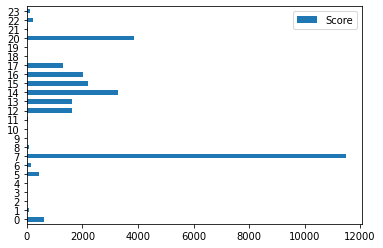

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 72.1674074074074
Test Prediction  72.26548148148149


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X7)
logreg_score_test = accuracy_score(test_Y7,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  94.26664448018933
Test Prediction  93.58234492358554
Test Prediction  95.96234984533832
Test Prediction  96.13781425035822
Test Prediction  93.18902646621392
Test Prediction  94.2571948318485
Test Prediction  93.50122827432075
Test Prediction  93.25234996384671


In [0]:
y_pred_test = logreg.predict(test_X8)
logreg_score_test = accuracy_score(test_Y8,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X9)
logreg_score_test = accuracy_score(test_Y9,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X10)
logreg_score_test = accuracy_score(test_Y10,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X11)
logreg_score_test = accuracy_score(test_Y11,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X12)
logreg_score_test = accuracy_score(test_Y12,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X13)
logreg_score_test = accuracy_score(test_Y13,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X14)
logreg_score_test = accuracy_score(test_Y14,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X15)
logreg_score_test = accuracy_score(test_Y15,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  80.27
Test Prediction  78.29666666666667
Test Prediction  81.67666666666666
Test Prediction  82.57
Test Prediction  76.16000000000001
Test Prediction  80.45
Test Prediction  77.84666666666666
Test Prediction  77.32333333333334


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,5.898634
6,vc,3.191046
5,vnet,1.389879
11,enqueue_time,0.845279
23,vnet_vc_cc_index,0.824245
3,flit_id,0.730746
17,port_index,0.590325
21,cache_coherence_vnet_index,0.359466
19,flit_index,0.225112
10,hop_percentage,0.194126


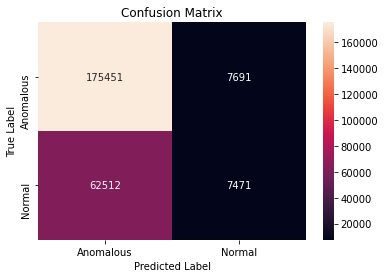

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83    183142
           1       0.49      0.11      0.18     69983

    accuracy                           0.72    253125
   macro avg       0.62      0.53      0.50    253125
weighted avg       0.67      0.72      0.65    253125



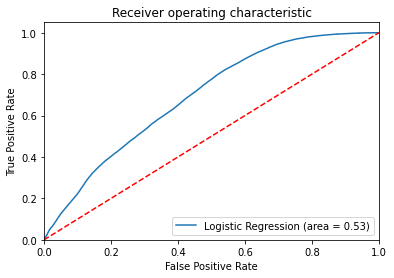

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

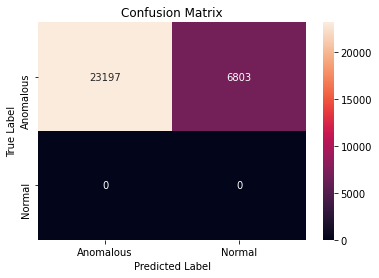

In [0]:
cm = confusion_matrix(test_Y15, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.77     30000
   macro avg       0.50      0.39      0.44     30000
weighted avg       1.00      0.77      0.87     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.10968537124873
Test Prediction  80.4686296346837


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X7)
knn_score_test = accuracy_score(test_Y7,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  86.74993877051187
Test Prediction  86.93318718136976


In [0]:
y_pred_knn_test= knn.predict(test_X8)
knn_score_test = accuracy_score(test_Y8,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X9)
knn_score_test = accuracy_score(test_Y9,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X10)
knn_score_test = accuracy_score(test_Y10,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X11)
knn_score_test = accuracy_score(test_Y11,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X12)
knn_score_test = accuracy_score(test_Y12,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X13)
knn_score_test = accuracy_score(test_Y13,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X14)
knn_score_test = accuracy_score(test_Y14,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X15)
knn_score_test = accuracy_score(test_Y15,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [0]:
cm = confusion_matrix(test_Y15, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15,y_pred_knn_test))

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X7)
nb_score_test = accuracy_score(test_Y7,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 36.18


In [0]:
y_pred_nb_test= nb.predict(test_X8)
nb_score_test = accuracy_score(test_Y8,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X9)
nb_score_test = accuracy_score(test_Y9,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X10)
nb_score_test = accuracy_score(test_Y10,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X11)
nb_score_test = accuracy_score(test_Y11,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X12)
nb_score_test = accuracy_score(test_Y12,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X13)
nb_score_test = accuracy_score(test_Y13,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X14)
nb_score_test = accuracy_score(test_Y14,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X15)
nb_score_test = accuracy_score(test_Y15,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

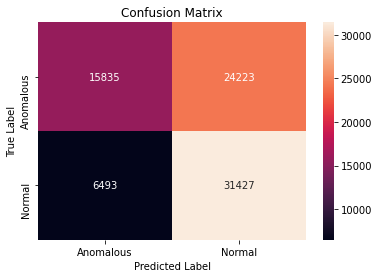

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51     40058
           1       0.56      0.83      0.67     37920

    accuracy                           0.61     77978
   macro avg       0.64      0.61      0.59     77978
weighted avg       0.64      0.61      0.59     77978



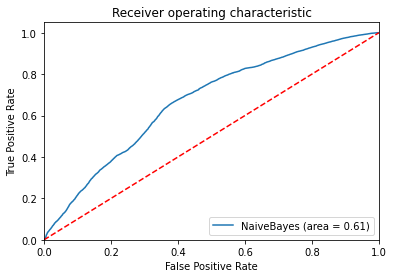

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 249528 samples, validate on 62383 samples
Epoch 1/10
249528/249528 [==============================] - 9s 34us/step - loss: 0.2243 - accuracy: 0.6337 - val_loss: 0.2156 - val_accuracy: 0.6609
Epoch 2/10
249528/249528 [==============================] - 8s 34us/step - loss: 0.2151 - accuracy: 0.6670 - val_loss: 0.2142 - val_accuracy: 0.6651
Epoch 3/10
249528/249528 [==============================] - 8s 33us/step - loss: 0.2147 - accuracy: 0.6672 - val_loss: 0.2138 - val_accuracy: 0.6704
Epoch 4/10
249528/249528 [==============================] - 8s 33us/step - loss: 0.2145 - accuracy: 0.6666 - val_loss: 0.2137 - val_accuracy: 0.6709
Epoch 5/10
249528/249528 [==============================] - 9s 36us/step - loss: 0.2145 - accuracy: 0.6652 - val_loss: 0.2141 - val_accuracy: 0.6642
Epoch 6/10
249528/249528 [==============================] - 9s 36us/step - loss: 0.2143 - accuracy: 0.6645 - val_loss: 0.2141 - val_accuracy: 0.6670
Epoch 7/10
249528/249528 [=============================

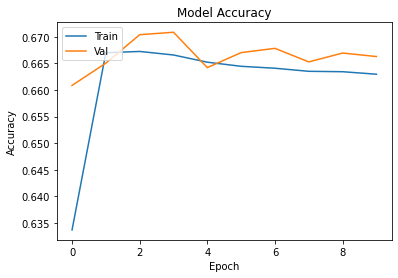

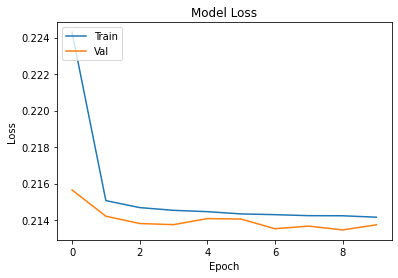

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.03%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.77%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.97%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 249528 samples, validate on 62383 samples
Epoch 1/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2480 - accuracy: 0.5411 - val_loss: 0.2468 - val_accuracy: 0.5560
Epoch 2/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2447 - accuracy: 0.5655 - val_loss: 0.2408 - val_accuracy: 0.5899
Epoch 3/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2318 - accuracy: 0.6239 - val_loss: 0.2229 - val_accuracy: 0.6458
Epoch 4/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2190 - accuracy: 0.6575 - val_loss: 0.2168 - val_accuracy: 0.6636
Epoch 5/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2167 - accuracy: 0.6633 - val_loss: 0.2160 - val_accuracy: 0.6667
Epoch 6/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2161 - accuracy: 0.6637 - val_loss: 0.2154 - val_accuracy: 0.6615
Epoch 7/30
249528/249528 [=============================

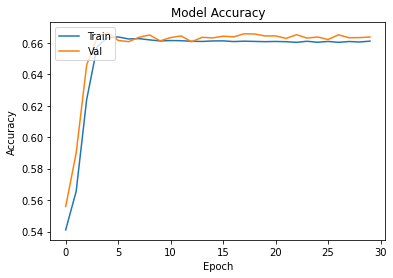

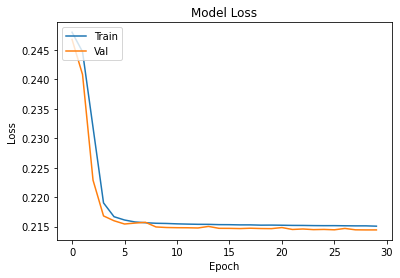

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.75%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.18%
accuracy: 75.04%
accuracy: 74.77%
accuracy: 70.04%
accuracy: 71.08%
accuracy: 65.93%
accuracy: 64.37%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 249528 samples, validate on 62383 samples
Epoch 1/30
249528/249528 [==============================] - 9s 36us/step - loss: 0.2482 - accuracy: 0.5530 - val_loss: 0.2451 - val_accuracy: 0.5741
Epoch 2/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2349 - accuracy: 0.6164 - val_loss: 0.2220 - val_accuracy: 0.6536
Epoch 3/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2157 - accuracy: 0.6642 - val_loss: 0.2114 - val_accuracy: 0.6749
Epoch 4/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2100 - accuracy: 0.6705 - val_loss: 0.2072 - val_accuracy: 0.6728
Epoch 5/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2071 - accuracy: 0.6754 - val_loss: 0.2064 - val_accuracy: 0.6815
Epoch 6/30
249528/249528 [==============================] - 9s 35us/step - loss: 0.2051 - accuracy: 0.6800 - val_loss: 0.2059 - val_accuracy: 0.6822
Epoch 7/30
249528/249528 [=============================

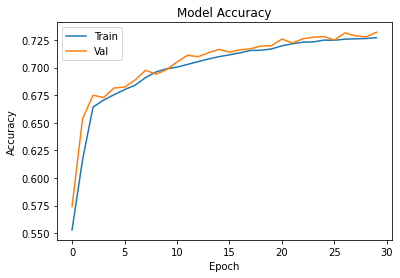

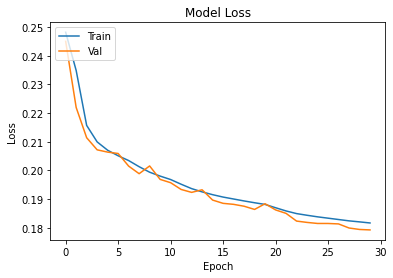

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.70%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.26%
accuracy: 74.80%
accuracy: 76.45%
accuracy: 70.81%
accuracy: 73.50%
accuracy: 66.08%
accuracy: 68.87%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 249528 samples, validate on 62383 samples
Epoch 1/100
249528/249528 [==============================] - 18s 71us/step - loss: 0.2014 - accuracy: 0.6925 - val_loss: 0.1870 - val_accuracy: 0.7272
Epoch 2/100
249528/249528 [==============================] - 16s 64us/step - loss: 0.1839 - accuracy: 0.7247 - val_loss: 0.1689 - val_accuracy: 0.7486
Epoch 3/100
249528/249528 [==============================] - 16s 65us/step - loss: 0.1767 - accuracy: 0.7361 - val_loss: 0.1626 - val_accuracy: 0.7569
Epoch 4/100
249528/249528 [==============================] - 16s 65us/step - loss: 0.1722 - accuracy: 0.7430 - val_loss: 0.1571 - val_accuracy: 0.7649
Epoch 5/100
249528/249528 [==============================] - 16s 64us/step - loss: 0.1685 - accuracy: 0.7507 - val_loss: 0.1555 - val_accuracy: 0.7612
Epoch 6/100
249528/249528 [==============================] - 16s 64us/step - loss: 0.1641 - accuracy: 0.7577 - val_loss: 0.1521 - val_accuracy: 0.7763
Epoch 7/100
249528/249528 [================

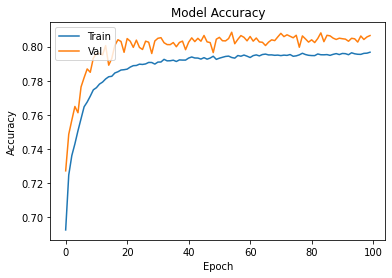

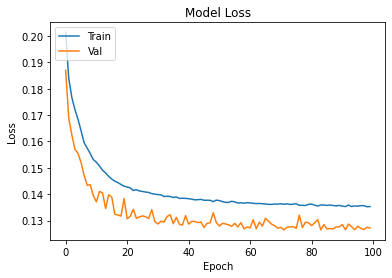

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.48%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.69%
accuracy: 65.30%
accuracy: 63.12%
accuracy: 64.87%
accuracy: 74.00%
accuracy: 53.90%
accuracy: 83.43%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 249528 samples, validate on 62383 samples
Epoch 1/50
249528/249528 [==============================] - 18s 70us/step - loss: 0.2047 - accuracy: 0.6865 - val_loss: 0.1956 - val_accuracy: 0.7058
Epoch 2/50
249528/249528 [==============================] - 17s 69us/step - loss: 0.1940 - accuracy: 0.7096 - val_loss: 0.1820 - val_accuracy: 0.7307
Epoch 3/50
249528/249528 [==============================] - 17s 70us/step - loss: 0.1849 - accuracy: 0.7257 - val_loss: 0.1784 - val_accuracy: 0.7371
Epoch 4/50
249528/249528 [==============================] - 17s 70us/step - loss: 0.1772 - accuracy: 0.7378 - val_loss: 0.1601 - val_accuracy: 0.7617
Epoch 5/50
249528/249528 [==============================] - 18s 72us/step - loss: 0.1714 - accuracy: 0.7450 - val_loss: 0.1608 - val_accuracy: 0.7640
Epoch 6/50
249528/249528 [==============================] - 17s 69us/step - loss: 0.1673 - accuracy: 0.7505 - val_loss: 0.1534 - val_accuracy: 0.7732
Epoch 7/50
249528/249528 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.17%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.09%
accuracy: 62.10%
accuracy: 61.14%
accuracy: 63.59%
accuracy: 72.96%
accuracy: 53.59%
accuracy: 79.32%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.78177428817835
Test Prediction Score 92.20934109620661


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 61.00666666666667
Test Prediction Score 60.85333333333334
Test Prediction Score 57.75
Test Prediction Score 58.24
Test Prediction Score 62.35333333333334
Test Prediction Score 57.37
Test Prediction Score 75.82


In [0]:
y_pred_dt_test= dt.predict(test_X8)
dt_score_test = accuracy_score(test_Y8,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X9)
dt_score_test = accuracy_score(test_Y9,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X10)
dt_score_test = accuracy_score(test_Y10,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X11)
dt_score_test = accuracy_score(test_Y11,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X12)
dt_score_test = accuracy_score(test_Y12,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X13)
dt_score_test = accuracy_score(test_Y13,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X14)
dt_score_test = accuracy_score(test_Y14,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X15)
dt_score_test = accuracy_score(test_Y15,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

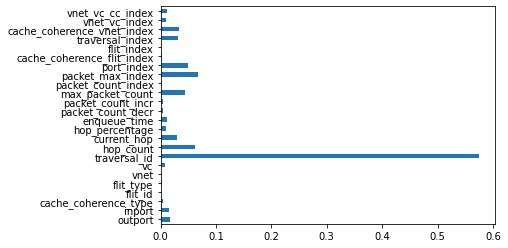

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

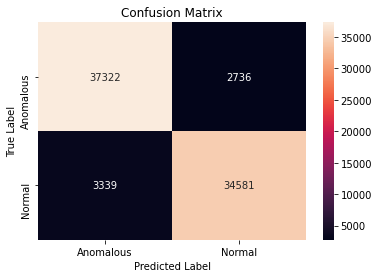

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     40058
           1       0.93      0.91      0.92     37920

    accuracy                           0.92     77978
   macro avg       0.92      0.92      0.92     77978
weighted avg       0.92      0.92      0.92     77978



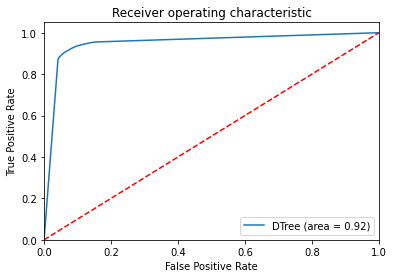

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.70027026940377
Test Prediction Score 93.01084921388085


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X7)
rf_score_test = accuracy_score(test_Y7,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 61.93333333333333
Test Prediction Score 62.41
Test Prediction Score 59.34
Test Prediction Score 60.156666666666666
Test Prediction Score 63.91
Test Prediction Score 57.513333333333335
Test Prediction Score 76.67666666666668


In [0]:
y_pred_rf_test= rf.predict(test_X8)
rf_score_test = accuracy_score(test_Y8,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X9)
rf_score_test = accuracy_score(test_Y9,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X10)
rf_score_test = accuracy_score(test_Y10,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X11)
rf_score_test = accuracy_score(test_Y11,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X12)
rf_score_test = accuracy_score(test_Y12,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X13)
rf_score_test = accuracy_score(test_Y13,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X14)
rf_score_test = accuracy_score(test_Y14,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X15)
rf_score_test = accuracy_score(test_Y15,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

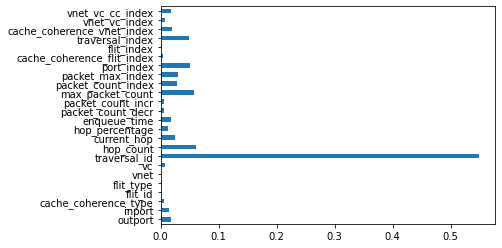

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

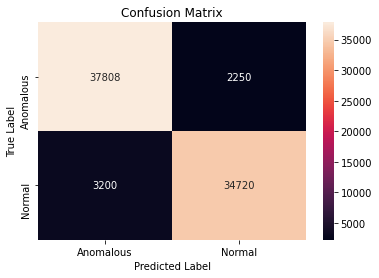

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     40058
           1       0.94      0.92      0.93     37920

    accuracy                           0.93     77978
   macro avg       0.93      0.93      0.93     77978
weighted avg       0.93      0.93      0.93     77978



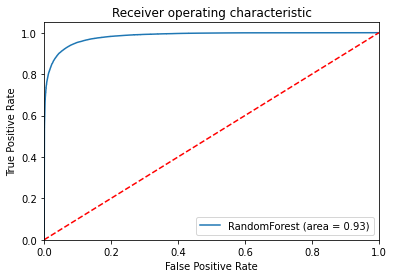

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.58567901234568
Test Prediction Score 95.71120987654321


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.95479505241555
Test Prediction Score 86.8795251766571
Test Prediction Score 86.91733033076724
Test Prediction Score 89.99153315097043
Test Prediction Score 86.2857706022542
Test Prediction Score 89.05825831428704
Test Prediction Score 86.84822962265196
Test Prediction Score 89.6765485659195


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X8)
xgbc_score_test = accuracy_score(test_Y8,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X9)
xgbc_score_test = accuracy_score(test_Y9,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X10)
xgbc_score_test = accuracy_score(test_Y10,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X11)
xgbc_score_test = accuracy_score(test_Y11,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X12)
xgbc_score_test = accuracy_score(test_Y12,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X13)
xgbc_score_test = accuracy_score(test_Y13,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X14)
xgbc_score_test = accuracy_score(test_Y14,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X15)
xgbc_score_test = accuracy_score(test_Y15,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 79.66333333333333
Test Prediction Score 81.34
Test Prediction Score 82.18333333333334
Test Prediction Score 89.27333333333334
Test Prediction Score 81.04
Test Prediction Score 85.77
Test Prediction Score 82.17999999999999
Test Prediction Score 86.54333333333334


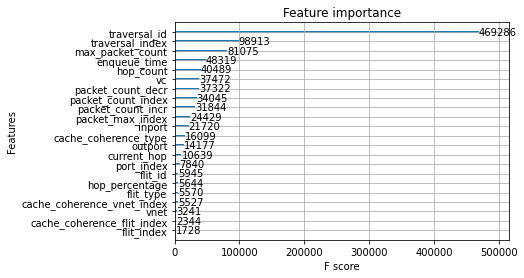

In [0]:
plot_importance(xgbc)
plt.show()

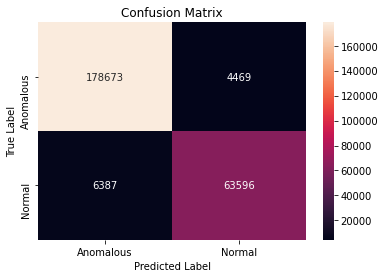

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    183142
           1       0.93      0.91      0.92     69983

    accuracy                           0.96    253125
   macro avg       0.95      0.94      0.95    253125
weighted avg       0.96      0.96      0.96    253125



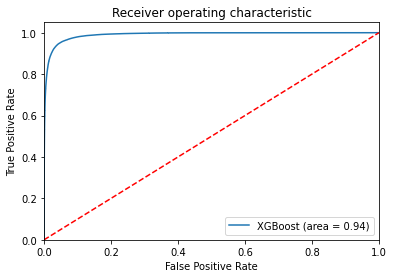

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 83.61007407407406
Test Prediction Score 83.20592592592592


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X7)
gbm_score_test = accuracy_score(test_Y7,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 89.43831234862351
Test Prediction Score 90.61373237054006
Test Prediction Score 91.24722462947618
Test Prediction Score 91.07984889930962
Test Prediction Score 89.44576845198631
Test Prediction Score 91.7188301693176
Test Prediction Score 89.931844627916
Test Prediction Score 91.63943118823813


In [0]:
y_pred_gbm_test = gbm.predict(test_X8)
gbm_score_test = accuracy_score(test_Y8,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X9)
gbm_score_test = accuracy_score(test_Y9,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X10)
gbm_score_test = accuracy_score(test_Y10,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X11)
gbm_score_test = accuracy_score(test_Y11,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X12)
gbm_score_test = accuracy_score(test_Y12,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X13)
gbm_score_test = accuracy_score(test_Y13,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X14)
gbm_score_test = accuracy_score(test_Y14,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X15)
gbm_score_test = accuracy_score(test_Y15,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 84.47333333333333
Test Prediction Score 84.20666666666666
Test Prediction Score 87.79
Test Prediction Score 90.71000000000001
Test Prediction Score 83.42333333333333
Test Prediction Score 87.13333333333333
Test Prediction Score 83.95333333333333
Test Prediction Score 87.06


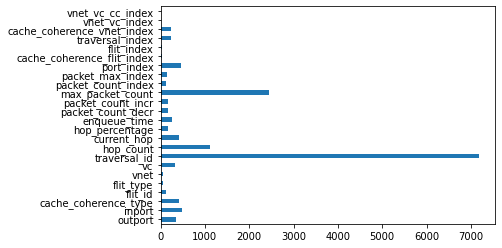

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

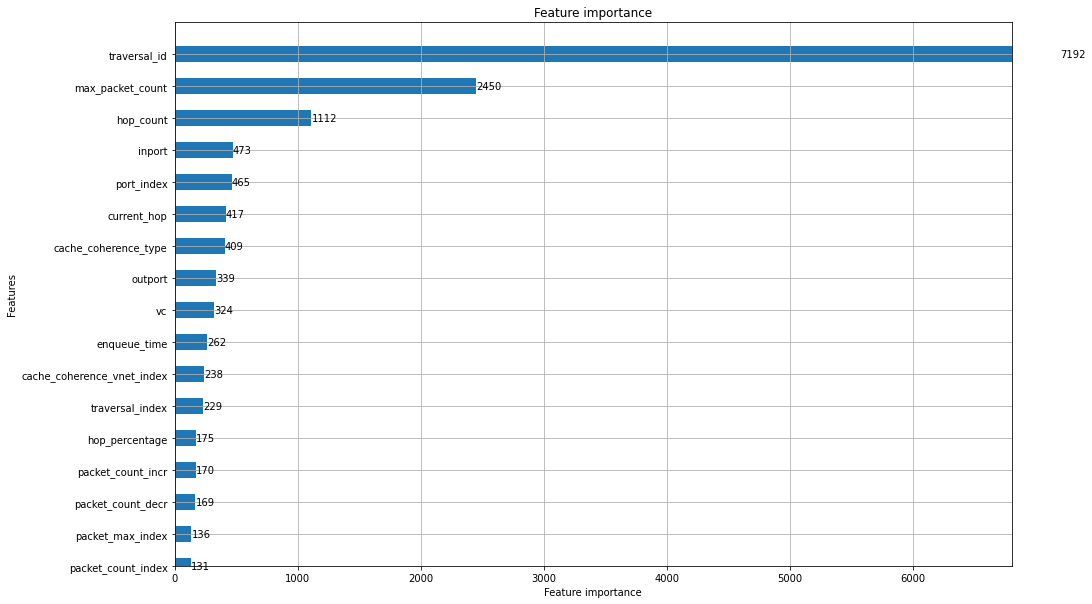

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[7192,
 2450,
 1112,
 473,
 465,
 417,
 409,
 339,
 324,
 262,
 238,
 229,
 175,
 170,
 169,
 136,
 131,
 123,
 64,
 51,
 39,
 30,
 2,
 0]

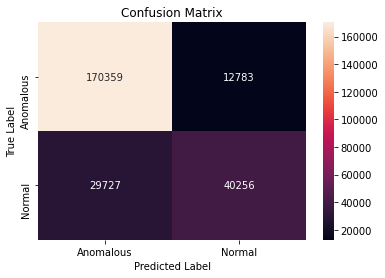

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89    183142
           1       0.76      0.58      0.65     69983

    accuracy                           0.83    253125
   macro avg       0.81      0.75      0.77    253125
weighted avg       0.83      0.83      0.82    253125



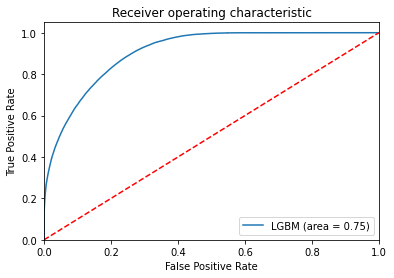

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()